# Loan Application Status Prediction

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [58]:
loan_data=pd.read_csv('D:\data project\loan_prediction.csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
print(loan_data.shape)

(614, 13)


In [60]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Observations:

* There are some missing value LoanAmount, Loan_Amount_Team and Credit_History 
* All are continous values in Applicantincome and coapplicantincome 

In [62]:
#describe function for non numeric variables.
q=loan_data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]
q.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [63]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [64]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [65]:
loan_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [66]:
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [67]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [68]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [69]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many of null value present in many of columns. Let's remove null value in this columns.

In [70]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

* There are missing values in the dataset so impute them
* impute the missing values for Gender- from the describe function we can notice that most of the applicants are Male so impute the missing values with Male
* For Married impute the missing values with Yes
* For dependents impute the missing values with 0
* For selfemployed impute with No

* For loan amount impute with

In [71]:
loan_data['Gender'].fillna(value='Male',inplace=True)
loan_data['Married'].fillna(value='Yes',inplace=True)
loan_data['Dependents'].fillna(value=0,inplace=True)
loan_data['Self_Employed'].fillna(value='No',inplace=True)

For continuous variables before imputing check for outliers. If outliers are there impute with median otherwise impute with mean

In [72]:
w=['LoanAmount','Loan_Amount_Term','Credit_History']

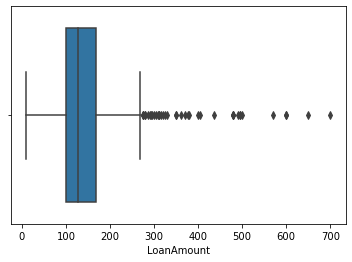

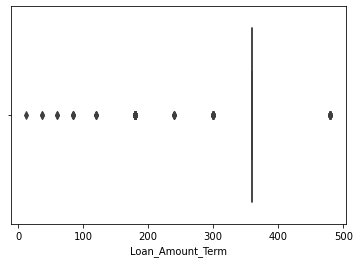

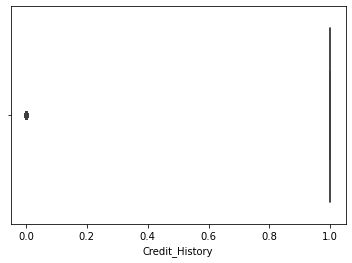

In [73]:
for i in w:
    sns.boxplot(x=i,data=loan_data)
    plt.show()

In [74]:
## as we can see oulier so impute with median.

for i in w:
    med_i=loan_data[i].median(skipna=True)
    print(med_i)

128.0
360.0
1.0


* for loan amount impute with 128
* for loan amount term impute with 360
* for credit history impute with 1

In [75]:
loan_data['LoanAmount'].fillna(value=128,inplace=True)
loan_data['Loan_Amount_Term'].fillna(value=360,inplace=True)
loan_data['Credit_History'].fillna(value=1,inplace=True)

In [76]:
# check missing values are imputed or not 

loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [78]:
##Drop the loan id column

loan_data=loan_data.drop('Loan_ID',axis=1)

* separte the continuous and categorical variables

In [79]:
## Numerical values 
a=[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

In [80]:
## Categorical Values 
b=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']

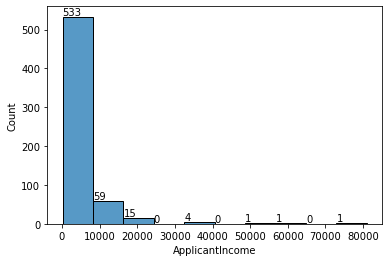

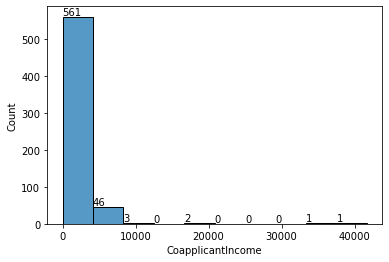

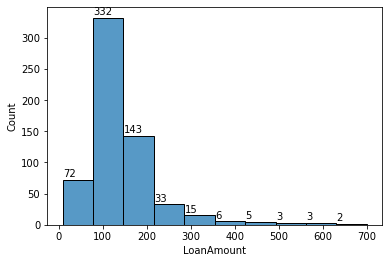

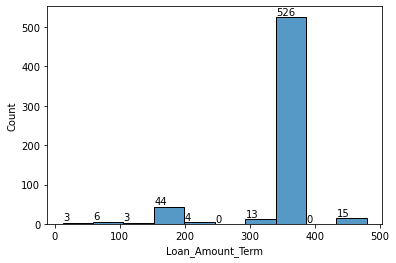

In [81]:
for i in a:
    ax=sns.histplot(loan_data[i],bins=10)
    for p in ax.patches:
        ax.annotate(p.get_height(),(p.get_x()+0.5,p.get_height()+5))
    
    plt.show()

* From the above plots we can analyze the following points.
* Income of most of the applicants is 0 to 10000
* Income of most of the co applicants is 0 to 5000
* For most of the applicants the loan amount is between 80 to 200
* For most of the applicants the loan term is 350 to 380.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

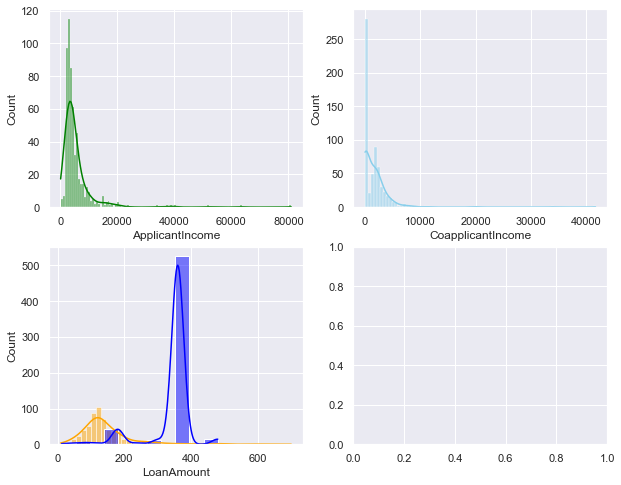

In [82]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=loan_data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=loan_data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=loan_data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=loan_data, x="Loan_Amount_Term", kde=True, ax=axs[1, 0], color='blue')

<AxesSubplot:ylabel='Loan_Amount_Term'>

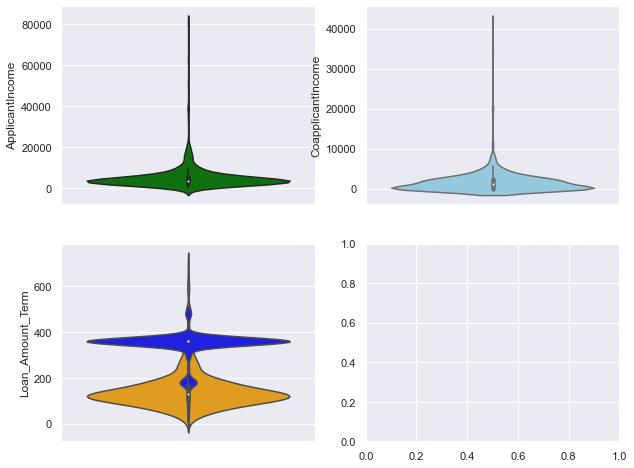

In [84]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.violinplot(data=loan_data, y="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.violinplot(data=loan_data, y="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.violinplot(data=loan_data, y="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.violinplot(data=loan_data, y="Loan_Amount_Term", kde=True, ax=axs[1, 0], color='blue')

* The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from both histogram and violin plot).
* The distribution of Loan Amount Term is negativly skewed and it has outliers.

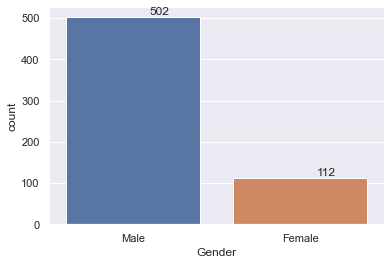

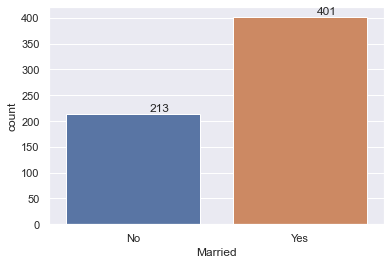

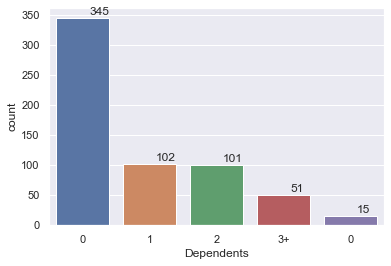

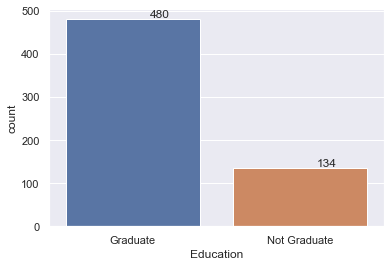

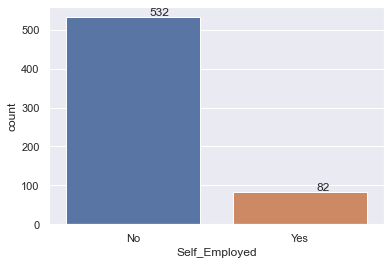

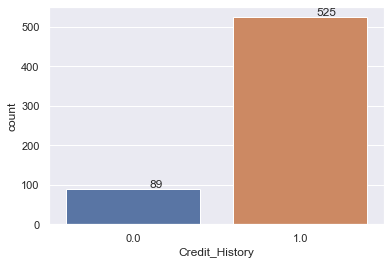

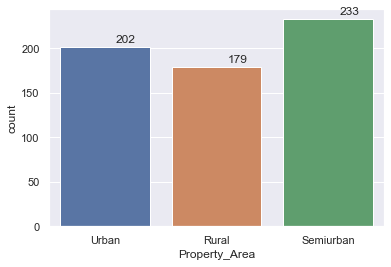

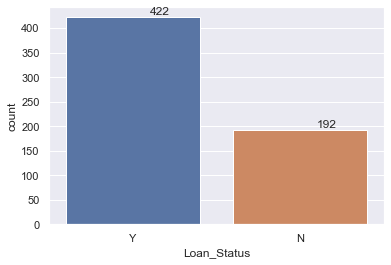

In [85]:
for i in b:
    ax1=sns.countplot(x=i,data=loan_data)
    for q in ax1.patches:
        ax1.annotate(q.get_height(),(q.get_x()+0.5,q.get_height()+5))

    plt.show()

* From the above plot we can analyze like below

* 502 Male applicants and 112 Female applicants
* 401 Married applicant 213 unmarried applicants
* For 345 applicants the dependents are 0, for 102 applicants 1 dependent, for 101 applicants there are 2 dependents and for 51 applicants there are 3+ dependents
* Graduate applicants are 480 and non graduate applicants are 134
* self employed applicants are 82 and salaried are 500
* For 89 applicants there credit history is 0 and for 475 applicants their credit history is 1.
* The applicants property area is in as follows for 202 applicants urban, for 179 applicants Rural and for 233 applicants semiurban
* Loan status for 422 applicants yes(eligible) and for 192 applicants No (not eligible)

In [86]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
## encode the categorical variables

loan_data_enc=pd.get_dummies(loan_data,drop_first=True)

In [88]:
loan_data_enc.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,0,0,1,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,0,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,0,1,0,0,0,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,0,1,0,0,0,0,1,0,0


In [91]:
loan_data_enc.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.090174,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,0.000949,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.136343,0.061976,0.020126,0.152850,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,0.106897,-0.088492,-0.010609,-0.077273,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,0.046697,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,-0.145082,-0.004466,0.129953,0.096319,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,-0.353905,0.113853,0.249547,0.132566,0.012304,0.004489,0.005845,0.000546,0.091478
Dependents_0,-0.090174,0.000949,-0.136343,0.106897,0.046697,-0.145082,-0.353905,1.000000,-0.505474,-0.502499,-0.340851,-0.042065,-0.087571,-0.006225,-0.052410,0.006250
Dependents_1,0.040861,-0.029769,0.061976,-0.088492,0.009757,-0.004466,0.113853,-0.505474,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740
Dependents_2,-0.034650,0.010016,0.020126,-0.010609,0.007987,0.129953,0.249547,-0.502499,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384


<AxesSubplot:>

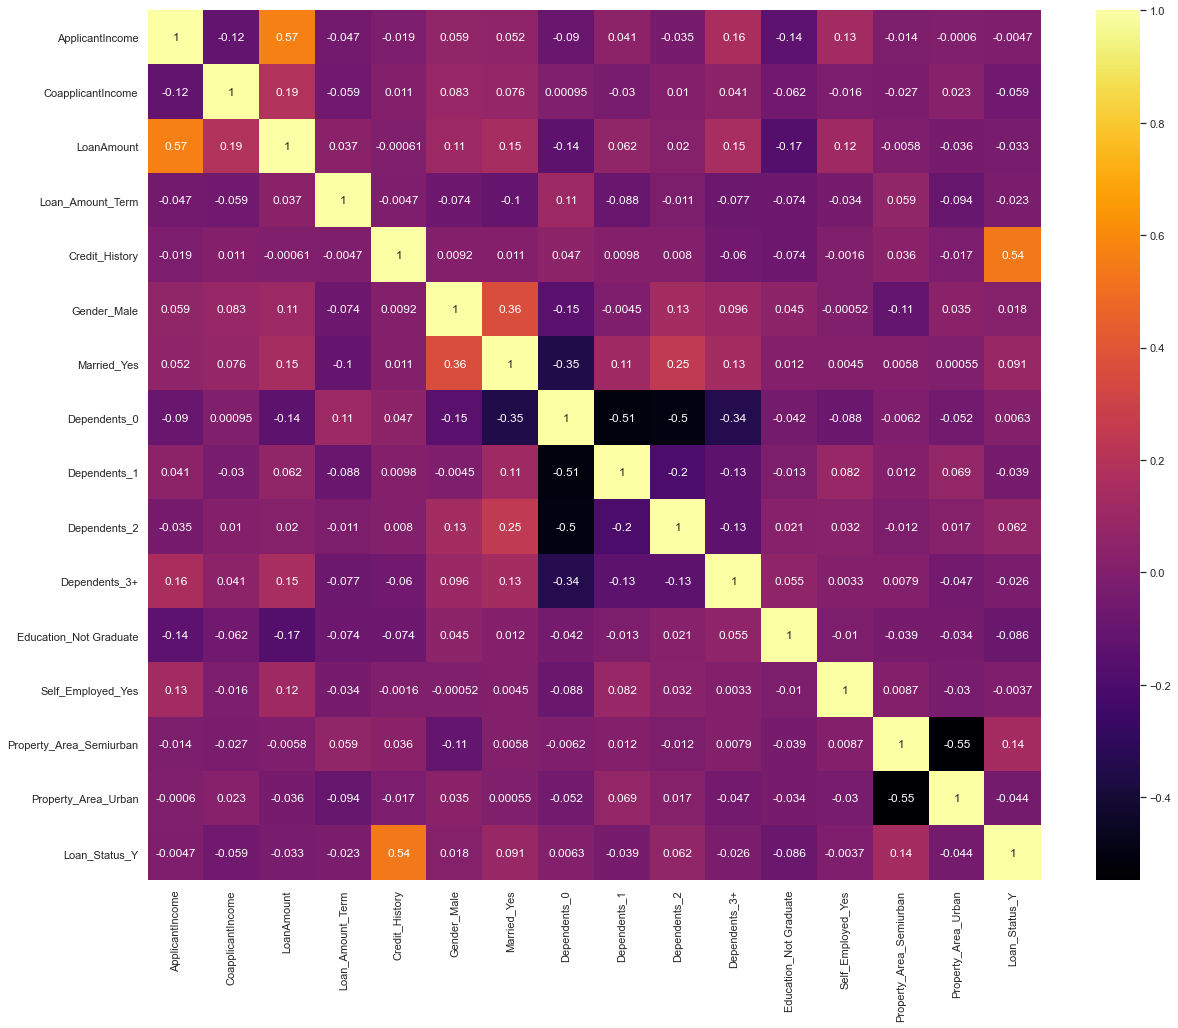

In [93]:
plt.figure(figsize=(20,16))
sns.heatmap(loan_data_enc.corr(), annot=True, cmap='inferno')

In [102]:
df = loan_data_enc[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

In [103]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,8.000000,8.000000,8.000000
mean,13220.187620,6289.280521,243.232460
std,27480.194323,14332.564054,260.679111
min,150.000000,0.000000,9.000000
25%,2311.625000,460.500000,96.214308
50%,4607.979642,1404.872899,136.876221
75%,5873.510418,2454.499592,277.062500
max,81000.000000,41667.000000,700.000000


In [104]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.999162,0.685743
CoapplicantIncome,0.999162,1.000000,0.700439
LoanAmount,0.685743,0.700439,1.000000


<AxesSubplot:>

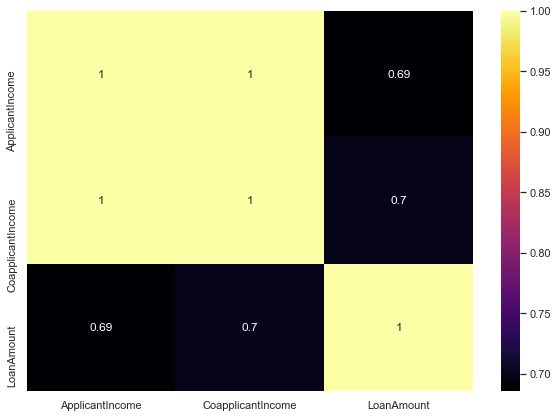

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno')

There is positive correlation between Loan Amount and Applicant Income

##  Data Preprocessing

In [106]:
X=loan_data_enc.drop(columns='Loan_Status_Y')
Y=loan_data_enc['Loan_Status_Y']

In [107]:
#split the data into train and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [108]:
X_train.shape

(491, 15)

In [109]:
X_test.shape

(123, 15)

# Models 

In [111]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Logistic Regression

In [112]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, Y_train)

Y_pred = LRclassifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(Y_pred,Y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123

[[ 0 39]
 [ 0 84]]
LR accuracy: 68.29%


## K-Nearest Neighbour (KNN)

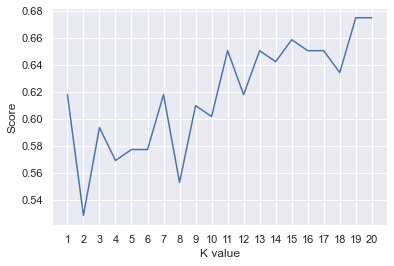

KNN best accuracy: 67.48%


In [113]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, Y_train)
    scoreListknn.append(KNclassifier.score(X_test, Y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))


## Support Vector Machine (SVM)

In [115]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, Y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(Y_pred,Y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123

[[ 0 39]
 [ 0 84]]
SVC accuracy: 68.29%


## Categorical NB

In [116]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, Y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(Y_pred,Y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123

[[ 0 39]
 [ 0 84]]
Categorical Naive Bayes accuracy: 68.29%


## Gaussian NB

In [117]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, Y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(Y_pred,Y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123

[[ 0 39]
 [ 0 84]]
Gaussian Naive Bayes accuracy: 68.29%


## Decision Tree

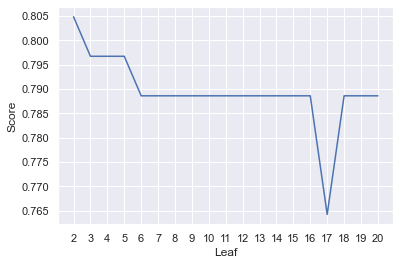

Decision Tree Accuracy: 80.49%


In [118]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, Y_train)
    scoreListDT.append(DTclassifier.score(X_test, Y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Random Forest

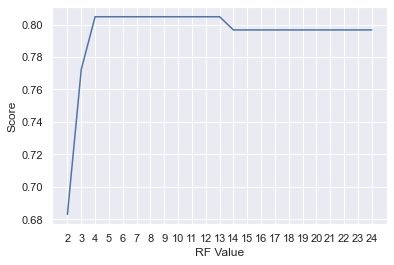

Random Forest Accuracy:  80.49%


In [119]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, Y_train)
    scoreListRF.append(RFclassifier.score(X_test, Y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## Gradient Boosting

In [120]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [122]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, Y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [123]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=1, max_leaf_nodes=40, n_estimators=500,
                           subsample=0.5)
0.8046666666666666
{'subsample': 0.5, 'n_estimators': 500, 'max_leaf_nodes': 40, 'max_depth': 1}
3


In [124]:
GBclassifier = GradientBoostingClassifier(subsample=1, n_estimators=200, max_depth=5, max_leaf_nodes=40)
GBclassifier.fit(X_train, Y_train)

Y_pred = GBclassifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(Y_pred,Y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65        39
           1       0.81      0.94      0.87        84

    accuracy                           0.81       123
   macro avg       0.81      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123

[[21 18]
 [ 5 79]]
Gradient Boosting accuracy: 81.30%


# Model Comparison

In [126]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=True)

,Model,Accuracy
1,K Neighbors,67.479675
0,Logistic Regression,68.292683
2,SVM,68.292683
3,Categorical NB,68.292683
4,Gaussian NB,68.292683
5,Decision Tree,80.487805
6,Random Forest,80.487805
7,Gradient Boost,81.300813
